In [3]:
#Followed the following github link 
# https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/18_transfer_learning/cnn_transfer_learning.ipynb
# downgrad tensorflow-estimator to 2.3.0 which is in the dependency lis of tensorflow_hub
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf

import pickle

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
import tensorflow_hub as hub

# Load Pretrained model

In [4]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

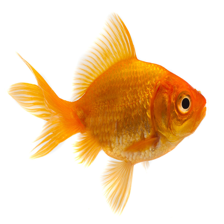

In [5]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [6]:

gold_fish = np.array(gold_fish)/255.0
gold_fish.shape
gold_fish[np.newaxis, ...]
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [7]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [8]:
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [9]:
image_labels[predicted_label_index]

'goldfish'

# Load Cifar10 dataset

In [10]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [11]:
len(X_test)

10000

In [12]:
y_train.shape

(50000, 1)

In [13]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [14]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
y_test = y_test.reshape(-1,)

In [16]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [17]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

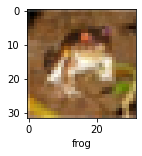

In [18]:
plot_sample(X_train, y_train, 0)

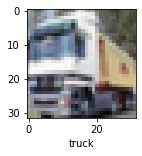

In [19]:
plot_sample(X_train, y_train, 1)

# Crop Cifar10 dataset to 10000 train image ang 1000 test image

In [36]:
X_train=X_train[:10000]
y_train=y_train[:10000]
X_test=X_test[:1000]
y_test=y_test[:1000]

In [37]:
Xtrain, ytrain = [], []

for i in range(len(X_train)):
    img = X_train[i]
    resized_img = cv2.resize(img,(224,224))
    Xtrain.append(resized_img)
    ytrain.append(y_train[i])

In [39]:
Xtest, ytest = [], []

for i in range(len(X_test)):
    img = X_test[i]
    resized_img = cv2.resize(img,(224,224))
    Xtest.append(resized_img)
    ytest.append(y_test[i])

In [40]:
Xtrain1 = np.array(Xtrain).astype('float16',casting='same_kind')
ytrain1 = np.array(ytrain).astype('float16',casting='same_kind')
Xtest1 = np.array(Xtest).astype('float16',casting='same_kind')
ytest1 = np.array(ytest).astype('float16',casting='same_kind')

In [42]:
X_train_scaled = Xtrain1 / 255
X_test_scaled = Xtest1 / 255

In [43]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [44]:
num_of_class = 10

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_class)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [45]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, ytrain1, epochs=5)

Epoch 1/5
313/313 [==============================] - 91s 291ms/step - loss: 0.7921 - acc: 0.7334
Epoch 2/5
313/313 [==============================] - 94s 299ms/step - loss: 0.4883 - acc: 0.8336
Epoch 3/5
313/313 [==============================] - 94s 299ms/step - loss: 0.4233 - acc: 0.8559
Epoch 4/5
313/313 [==============================] - 93s 297ms/step - loss: 0.3820 - acc: 0.8706
Epoch 5/5
313/313 [==============================] - 93s 296ms/step - loss: 0.3486 - acc: 0.8816


In [46]:
model.evaluate(X_test_scaled,ytest1)

32/32 [==============================] - 9s 273ms/step - loss: 0.5245 - acc: 0.8270


[0.52447110414505, 0.8270000219345093]

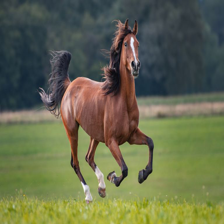

In [48]:
horse = Image.open("horse.jpg").resize(IMAGE_SHAPE)
horse

In [49]:
horse = np.array(horse)/255.0
horse.shape
horse[np.newaxis, ...]
result = model.predict(horse[np.newaxis, ...])
result.shape

(1, 10)

In [51]:
predicted_label_index = np.argmax(result)
classes[predicted_label_index]

'horse'